In [5]:
print(csv_files)

['/home/yanjun/Documents/FEM_results/contact-area/s-1000-m-3-10-c-0.2-e-43604/T-s-1000-m-3-10-c-0.2-e-43604.csv', '/home/yanjun/Documents/FEM_results/contact-area/s-1000-m-3-10-c-0.6-e-43604/T-s-1000-m-3-10-c-0.6-e-43604.csv', '/home/yanjun/Documents/FEM_results/contact-area/s-1000-m-3-10-c-1-e-43604/T-s-1000-m-3-10-c-1-e-43604.csv']


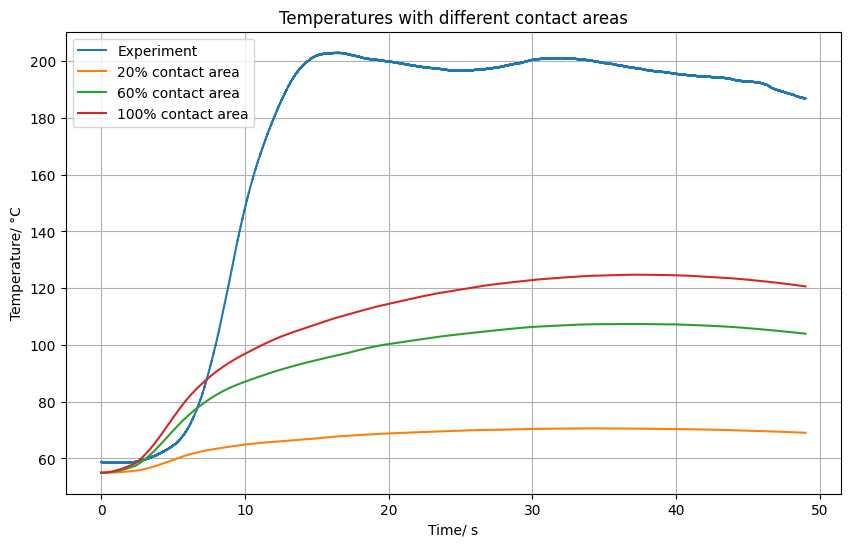

In [2]:
import os
import shutil
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Source and destination directories
source_dir = '/home/yanjun/Documents/FEM_results/incorrect_dt/contact-area'
destination_dir = '/home/yanjun/Documents/FEniCSx/Projecct/Data/incorrect_dt/contact-area'

# Function to collect CSV files recursively
def collect_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files
    
# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)


for file in csv_files:
    shutil.copy(file, destination_dir)
    

def extract_contact_area(file_name):
    label = file_name.split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        return 100
    else:
        return int(float(label) * 100)
        

csv_files.sort(key=lambda x: extract_contact_area(os.path.basename(x)))


plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment")

for csv_file in csv_files:
    # Extract label from file name
    label = os.path.basename(csv_file).split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        label = '100% contact area'
    else:
        label = f"{int(float(label) * 100)}% contact area"  # Convert "0.2" to "20% contact area"
    
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 2]  # Assuming temperature is in the third column (index 2)

    rolling_mean = temperature_data.rolling(window=50, min_periods=0).mean()
    
    # Plot data
    plt.plot(time_data, rolling_mean, label=label)
    

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Temperatures with different contact areas')
plt.legend()
plt.grid(True)
plt.show()

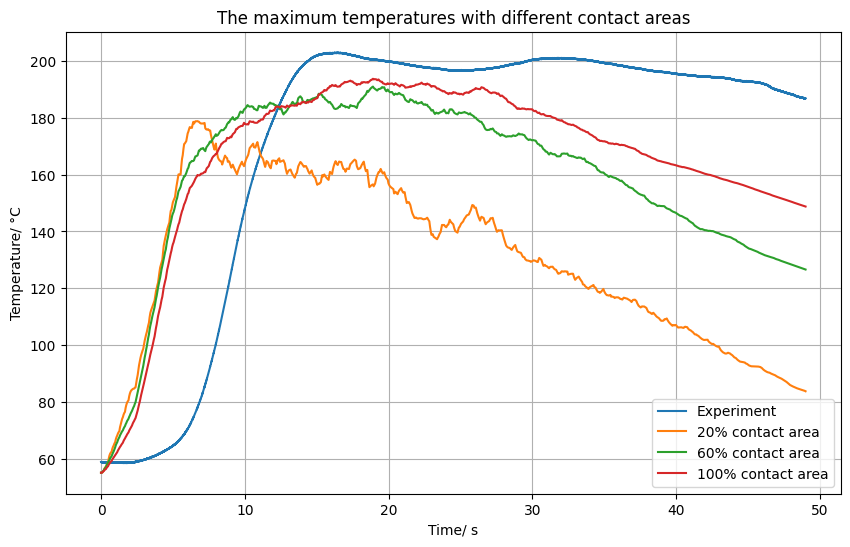

In [4]:
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment")

for csv_file in csv_files:
    # Extract label from file name
    label = os.path.basename(csv_file).split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        label = '100% contact area'
    else:
        label = f"{int(float(label) * 100)}% contact area"  # Convert "0.2" to "20% contact area"
    
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 3]  # Assuming temperature is in the third column (index 2)

    rolling_mean = temperature_data.rolling(window=50, min_periods=0).mean()
    
    # Plot data
    plt.plot(time_data, rolling_mean, label=label)
     
    

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different contact areas')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print(file_name)

T-s-1000-m-3-10-c-0.2-e-43604.csv
